Environment

In [131]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1]:
from Environment.E_commerce import *

In [2]:
# Hp: the costs are 80% of the lower prices

P1 = Product(0,[10,13,16,19],[ 2.,  5.,  8., 11.])
P2 = Product(1,[20,23,26,29],[ 4.,  7., 10., 13.])
P3 = Product(2,[30,33,36,39],[ 6.,  9., 12., 15.])
P4 = Product(3,[40,43,46,49],[ 8., 11., 14., 17.])
P5 = Product(4,[50,53,56,59],[10., 13., 16., 19.])

products = [P1,P2,P3,P4,P5]

In [3]:
# E_commerce inizialization
E = E_commerce()
E.set_products(products)
E.set_lambda(0.5)
# xij = probabilities starting from product i to see product j
E.graph

array([[0. , 0. , 0.5, 0. , 1. ],
       [0.5, 0. , 1. , 0. , 0. ],
       [1. , 0.5, 0. , 0. , 0. ],
       [0. , 0. , 1. , 0. , 0.5],
       [0. , 0. , 1. , 0.5, 0. ]])

Step 2: Optimization algorithm

In [4]:
from Algorithms.Greedy_algorithm import *
import matplotlib.pyplot as plt

In [5]:
#matrix with the difference between prices and costs
#mij margins on the price j for the product i
margins = np.zeros((5,4))

for i in range(5):
    margins[i,:] = np.array(products[i].margins_list)
    

#Conversion rate matrix
#in this step all conversion rates are known
#pij conversion rate of price j for the product i
#with higer price (j+1>j) -> lower conversion rate
p1 = np.array([0.38, 0.16, 0.15, 0.1])
p2 = np.array([0.42, 0.41, 0.18, 0.12])
p3 = np.array([0.32, 0.28, 0.17, 0.13])
p4 = np.array([0.36, 0.33, 0.25, 0.18])
p5 = np.array([0.30, 0.29, 0.22, 0.15])
C = np.array([p1,p2,p3,p4,p5])

# rewards per price
#Conversion rate matrix
#in this step all conversion rates are known
#pij conversion rate of price j for the product i
#with higer price (j+1>j) -> lower conversion rate
R = C*margins
R

array([[0.76, 0.8 , 1.2 , 1.1 ],
       [1.68, 2.87, 1.8 , 1.56],
       [1.92, 2.52, 2.04, 1.95],
       [2.88, 3.63, 3.5 , 3.06],
       [3.  , 3.77, 3.52, 2.85]])

In [6]:
# computation of the optimal configuration
opt = 0
for i in range(5):
    opt += np.max(R[i,:])
opt

13.99

In [7]:
lista = Greedy_algorithm(np.array(C), np.array(margins)) 
max_found = lista[0]
products_to_increase = lista[1]
rewards_per_configuration = lista[2]
max_reward_history = lista[3]
num_it = lista[4]

Iterazione  1
10.280000000000001
11.429999999999998
10.84
10.99
11.009999999999998
Iterazione  2
12.92
12.52
12.04
12.39
12.27
Iterazione  3
11.959999999999999
11.72
11.870000000000001
11.52
11.29
__________________
max unitary reward:  12.92
__________________
best configuration: 
1 ): 
increase price of the product 1
2 ): 
increase price of the product 2
3 ): 
increase price of the product 1


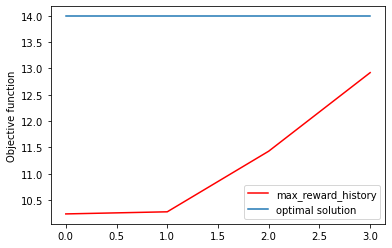

In [8]:
 #maximization of the cumulative expected margin over all the products
plt.ylabel("Objective function")
plt.plot(range(len(max_reward_history)),max_reward_history, 'r')
plt.plot(range(len(max_reward_history)),np.ones(len(max_reward_history))*opt)
plt.legend(["max_reward_history", "optimal solution"])
#we can see that greedy algorithm not always reach the optimal solution

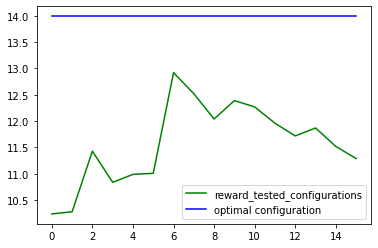

In [9]:
plt.plot(rewards_per_configuration, 'g')
plt.plot(np.ones(len(rewards_per_configuration))*opt, 'b')
plt.legend(["reward_tested_configurations","optimal configuration"])

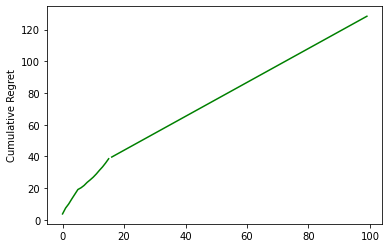

In [10]:
# If we test in each day a new configuration we get this regret (over a period of X days) and we never reach the optimal solution
plt.ylabel("Cumulative Regret")
plt.plot(np.cumsum(opt - rewards_per_configuration, axis=0), 'g')
#regret over 100 days
rewards_greedy = np.ones(100-len(rewards_per_configuration))*np.max(rewards_per_configuration)
plt.plot(range(len(rewards_per_configuration),100),np.sum(opt - rewards_per_configuration, axis=0)+np.cumsum(opt - rewards_greedy, axis=0), 'g')

Step 3: Optimization with uncertain conversion rates

In [ ]:
#fixed graph weights, fixed alphas, homogeneous users

In [ ]:
E = E_commerce()
E.set_products(products)
E.set_lambda(0.5)

In [325]:
from Algorithms.Estimate_conv_rates import *

In [346]:
#Estimate Conversion Rates
#Ts but chosing each round a random arm
n_arms = 4
num_users = 1000
binary_vector = np.array([127,0]) #fixed graph weights, homogeneous users
n_days = 100
#for product 0
product_index= 0
fixed_alpha = 1


env = Environment(n_arms, E, product_index, num_users, binary_vector, fixed_alpha)
cr_learner = Conv_rates(n_arms=n_arms)

for d in range(n_days):
    
    pulled_arm = cr_learner.pull_arm()
    
    reward = env.round(pulled_arm)
    cr_learner.update(pulled_arm, reward, env.clicks_current_day, env.purchases_current_day)

print("mean collected rewards: ", np.mean(cr_learner.collected_rewards))


mean collected rewards:  2.6909835690969173


In [348]:
conversion_rates = cr_learner.beta_parameters[:,0]/(cr_learner.beta_parameters[:,0]+cr_learner.beta_parameters[:,1])
print("conversion rates")
print(conversion_rates)
print("mean rewards per arm")
print(cr_learner.expected_rewards)
#we can see optimal clarvoyant solution is given chosing each round arm X {0,1,2,3}
opt = np.max(np.array(E.products[0].margins_list) * conversion_rates)
print("Optimal solution for arm ", np.argmax(np.array(E.products[0].margins_list)) * conversion_rates)
print(opt)

conversion rates
[0.98667574 0.86406186 0.42239614 0.0616156 ]
mean rewards per arm
[1.40407855 3.4846676  3.40190269 0.28494705]
Optimal solution : 4.32030932030932


In [11]:
from Algorithms.UCB_Learner import *

end


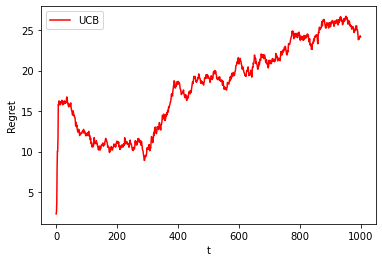

In [365]:
#UCB

n_arms = 4

ucb_rewards_per_experiment = []

num_users = 100
binary_vector = np.array([127,0]) 
n_days = 1000
product_index= 0
fixed_alpha = 1


env = Environment(n_arms, E, product_index, num_users, binary_vector, fixed_alpha)
ucb_learner = UCB(n_arms=n_arms)
for d in range(n_days):
    E.simulate_day(num_users, binary_vector, 1)
    
    pulled_arm = ucb_learner.pull_arm()
    reward = env.round(pulled_arm)
    ucb_learner.update(pulled_arm, reward)


print("end")
plt.figure(0)
plt.xlabel("t")
plt.ylabel("Regret")
plt.plot(np.cumsum((opt - ucb_learner.collected_rewards)), 'r')
plt.legend(["UCB"])
plt.show()

4.296141835692139

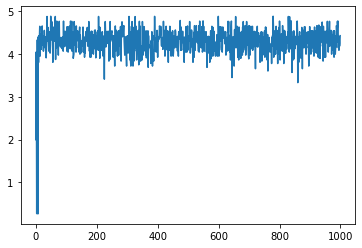

In [366]:
plt.plot(ucb_learner.collected_rewards)
np.mean(ucb_learner.collected_rewards)

In [367]:
print("mean rewards per arm")
print(ucb_learner.empirical_means)
print("confidence")
print(ucb_learner.confidence)
pulls_per_arm = [len(ucb_learner.rewards_per_arm[0]),len(ucb_learner.rewards_per_arm[1]),len(ucb_learner.rewards_per_arm[2]),len(ucb_learner.rewards_per_arm[3])]
print("pulls per arm")
print(pulls_per_arm)


mean rewards per arm
[2.         4.29666183 1.29610518 0.09142712]
confidence
[1.26863624 0.11789361 1.39495883 1.44202689]


In [61]:
from Algorithms.TS_Learner import *

end


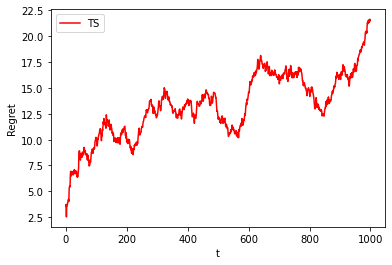

In [377]:
#Thompson Sampling
n_arms = 4

num_users = 100
binary_vector = np.array([127,0]) 
n_days = 1000
product_index= 0
fixed_alpha = 1


env = Environment(n_arms, E, product_index, num_users, binary_vector, fixed_alpha)
ts_learner = TS(n_arms=n_arms)
for d in range(n_days):
    E.simulate_day(num_users, binary_vector, 1)
    
    pulled_arm = ts_learner.pull_arm(env.margins_list)
    reward = env.round(pulled_arm)
    ts_learner.update(pulled_arm, reward, env.clicks_current_day, env.purchases_current_day)

print("end")
plt.figure(0)
plt.xlabel("t")
plt.ylabel("Regret")
plt.plot(np.cumsum((opt - ts_learner.collected_rewards)), 'r')
plt.legend(["TS"])
plt.show()

4.298774572965254

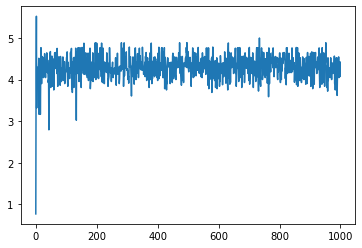

In [378]:
plt.plot(ts_learner.collected_rewards)
np.mean(ts_learner.collected_rewards)

In [379]:
print("mean rewards per arm")
print(ts_learner.expected_rewards)
print("conversion rates of the samples")
print(ts_learner.beta_parameters[:,0]/(ts_learner.beta_parameters[:,0]+ts_learner.beta_parameters[:,1]))
pulls_per_arm = [len(ts_learner.rewards_per_arm[0]),len(ts_learner.rewards_per_arm[1]),len(ts_learner.rewards_per_arm[2]),len(ts_learner.rewards_per_arm[3])]
print("pulls per arm")
print(pulls_per_arm)

mean rewards per arm
[0.         4.29337565 2.83276566 0.76744186]
conversion rates of the samples
[0.5        0.86169256 0.46171694 0.08888889]
pulls per arm
[1, 990, 11, 2]


end


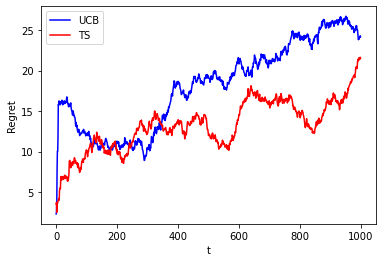

(4296.1418356921395, 4298.774572965253)

In [381]:
#Comparison between UCB and TS
opt = np.max(np.array(E.products[0].margins_list) * conversion_rates)
print("end")
plt.figure(0)
plt.xlabel("t")
plt.ylabel("Regret")
plt.plot(np.cumsum((opt - ucb_learner.collected_rewards)), 'b')
plt.plot(np.cumsum((opt - ts_learner.collected_rewards)), 'r')
plt.legend(["UCB","TS"])
plt.show()

np.sum(ucb_learner.collected_rewards), np.sum(ts_learner.collected_rewards)

In [285]:
print("UCB reward: ",np.sum(ucb_learner.collected_rewards))
print("TS reward: ", np.sum(ts_learner.collected_rewards))

UCB reward:  3358.02821288794
TS reward:  3447.966805098904
